In [2]:
from test_models.unetplusplus import NestedUNet
#from models.deeplabv3resnet50 import UNetDeeplab
from test_models.deeplabv3resnet101 import UNetDeeplab101

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import pandas as pd
from PIL import Image
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import pandas as pd
from PIL import Image
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Data Loader**

In [3]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        mask_name = self.data.iloc[idx, 1]
        image = Image.open(img_name).convert('RGB')  # Correct variable name
        mask = Image.open(mask_name).convert('L')    # Correct variable name
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        mask = (mask > 0.5).float()

        return image, mask

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_csv_file = "/home/maitha.alnaqbi/Desktop/ai702_project/Coronary/train/train_data.csv"
test_csv_file = "/home/maitha.alnaqbi/Desktop/ai702_project/Coronary/test/test_data.csv"

train_dataset = CustomDataset(train_csv_file, transform=transform)
test_dataset = CustomDataset(test_csv_file, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, drop_last=True)

val_csv_file = "/home/maitha.alnaqbi/Desktop/ai702_project/Coronary/val/val_data.csv"
val_dataset = CustomDataset(val_csv_file, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

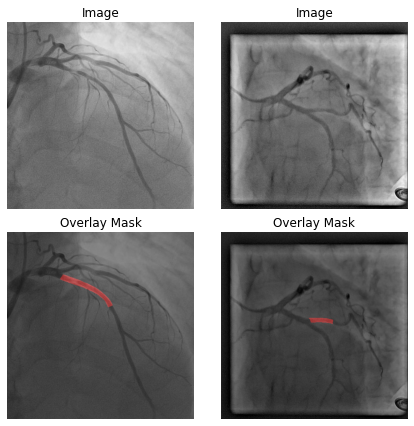

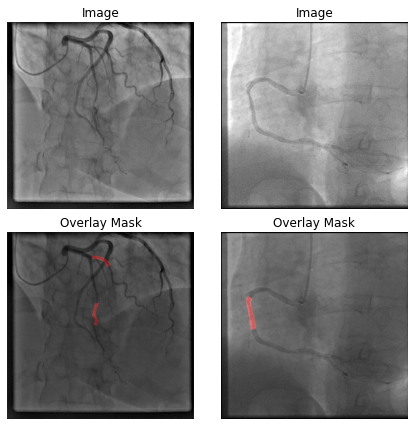

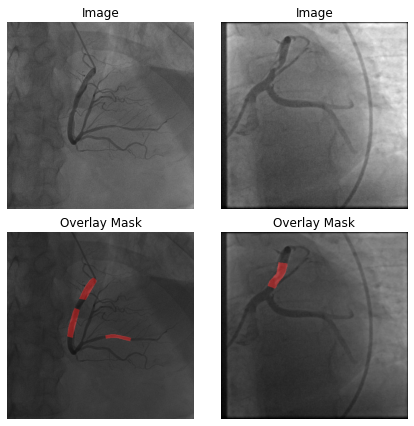

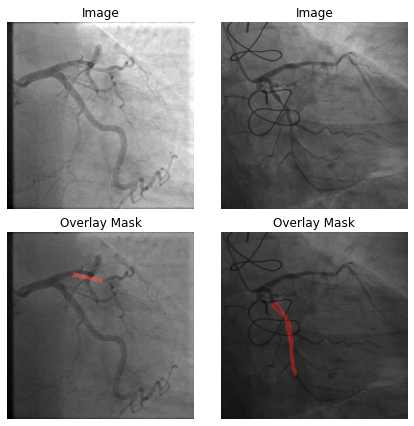

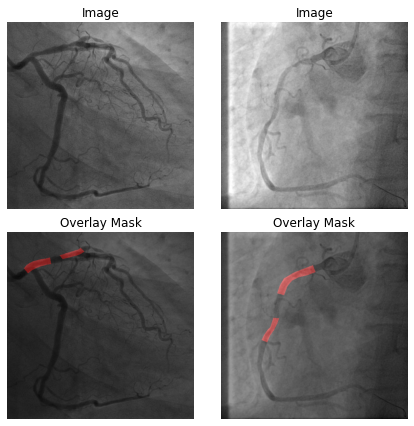

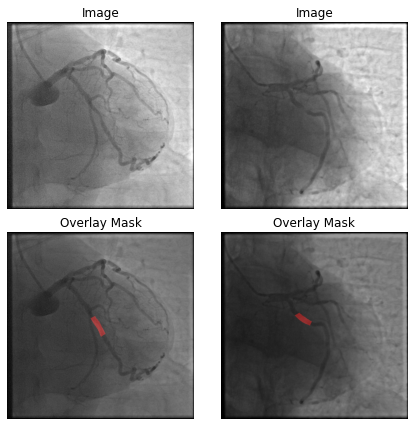

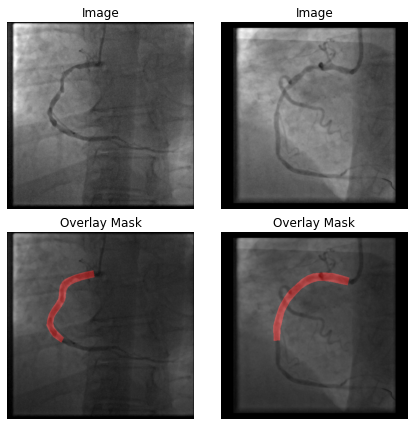

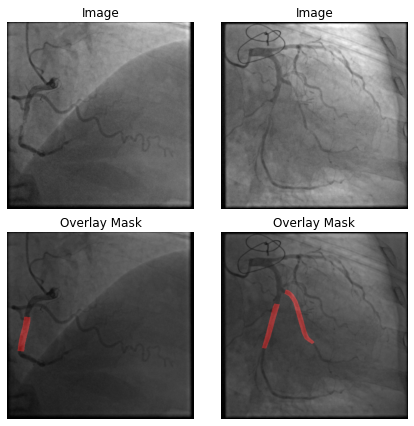

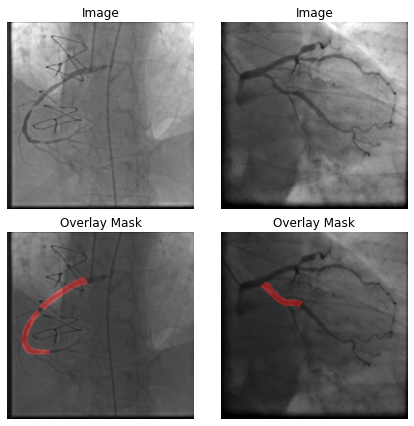

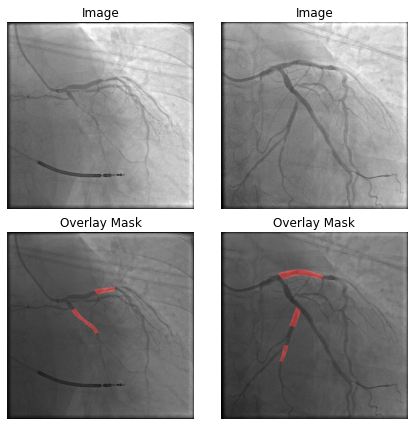

In [20]:
def overlay_mask(image, mask):
    alpha = 0.4 
    overlay = np.array(image)
    mask = np.array(mask)
    overlay[:, :, 0] = overlay[:, :, 0] * (1 - alpha) + mask * alpha
    overlay[:, :, 1] = overlay[:, :, 1] * (1 - alpha)
    overlay[:, :, 2] = overlay[:, :, 2] * (1 - alpha)
    return overlay

for i, (image, mask) in enumerate(train_loader):
    if i == 5:
        break
    plt.figure(figsize=(15, 6))
    for j in range(len(image)):
        plt.subplot(2, 5, j+1)
        plt.imshow(image[j].permute(1, 2, 0))
        plt.title('Image')
        plt.axis('off')
        plt.subplot(2, 5, j+6)
        plt.imshow(overlay_mask(image[j].permute(1, 2, 0), mask[j]))
        plt.title('Overlay Mask')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

for i, (image, mask) in enumerate(test_loader):
    if i == 5:
        break
    plt.figure(figsize=(15, 6))
    for j in range(len(image)):
        plt.subplot(2, 5, j+1)
        plt.imshow(image[j].permute(1, 2, 0))
        plt.title('Image')
        plt.axis('off')
        plt.subplot(2, 5, j+6)
        plt.imshow(overlay_mask(image[j].permute(1, 2, 0), mask[j]))
        plt.title('Overlay Mask')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


**Vanilla UNET++**

Epoch 1/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0936 | Val Loss: 0.0867 | Train IoU: 0.0018 | Val IoU: 0.0000 | Train Dice: 0.0036 | Val Dice: 0.0000 | Train Accuracy: 0.9880 | Val Accuracy: 0.9912 | Train Precision: 0.0055 | Val Precision: 0.0000 | Train Recall: 0.0026 | Val Recall: 0.0000 | Train F1: 0.0036 | Val F1: 0.0000
Epoch 2/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0347 | Val Loss: 0.0396 | Train IoU: 0.0000 | Val IoU: 0.0000 | Train Dice: 0.0000 | Val Dice: 0.0000 | Train Accuracy: 0.9919 | Val Accuracy: 0.9912 | Train Precision: 0.0000 | Val Precision: 0.0000 | Train Recall: 0.0000 | Val Recall: 0.0000 | Train F1: 0.0000 | Val F1: 0.0000
Epoch 3/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0295 | Val Loss: 0.0364 | Train IoU: 0.0000 | Val IoU: 0.0000 | Train Dice: 0.0000 | Val Dice: 0.0000 | Train Accuracy: 0.9919 | Val Accuracy: 0.9912 | Train Precision: 0.0000 | Val Precision: 0.0000 | Train Recall: 0.0000 | Val Recall: 0.0000 | Train F1: 0.0000 | Val F1: 0.0000
Epoch 4/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0269 | Val Loss: 0.0299 | Train IoU: 0.0000 | Val IoU: 0.0000 | Train Dice: 0.0000 | Val Dice: 0.0000 | Train Accuracy: 0.9919 | Val Accuracy: 0.9912 | Train Precision: 0.0000 | Val Precision: 0.0000 | Train Recall: 0.0000 | Val Recall: 0.0000 | Train F1: 0.0000 | Val F1: 0.0000
Epoch 5/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0257 | Val Loss: 0.0296 | Train IoU: 0.0000 | Val IoU: 0.0000 | Train Dice: 0.0000 | Val Dice: 0.0000 | Train Accuracy: 0.9919 | Val Accuracy: 0.9912 | Train Precision: 0.2000 | Val Precision: 0.0000 | Train Recall: 0.0000 | Val Recall: 0.0000 | Train F1: 0.0000 | Val F1: 0.0000
Epoch 6/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0241 | Val Loss: 0.0274 | Train IoU: 0.0000 | Val IoU: 0.0000 | Train Dice: 0.0000 | Val Dice: 0.0000 | Train Accuracy: 0.9919 | Val Accuracy: 0.9912 | Train Precision: 0.0000 | Val Precision: 0.0000 | Train Recall: 0.0000 | Val Recall: 0.0000 | Train F1: 0.0000 | Val F1: 0.0000
Epoch 7/100
----------


/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 0.0233 | Val Loss: 0.0252 | Train IoU: 0.0001 | Val IoU: 0.0000 | Train Dice: 0.0001 | Val Dice: 0.0000 | Train Accuracy: 0.9919 | Val Accuracy: 0.9912 | Train Precision: 0.2569 | Val Precision: 0.0000 | Train Recall: 0.0001 | Val Recall: 0.0000 | Train F1: 0.0001 | Val F1: 0.0000
Epoch 8/100
----------
Train Loss: 0.0224 | Val Loss: 0.0290 | Train IoU: 0.0110 | Val IoU: 0.1595 | Train Dice: 0.0218 | Val Dice: 0.2752 | Train Accuracy: 0.9919 | Val Accuracy: 0.9908 | Train Precision: 0.5914 | Val Precision: 0.4482 | Train Recall: 0.0111 | Val Recall: 0.1985 | Train F1: 0.0218 | Val F1: 0.2752
Epoch 9/100
----------
Train Loss: 0.0217 | Val Loss: 0.0338 | Train IoU: 0.1081 | Val IoU: 0.0263 | Train Dice: 0.1951 | Val Dice: 0.0513 | Train Accuracy: 0.9922 | Val Accuracy: 0.9912 | Train Precision: 0.5864 | Val Precision: 0.5552 | Train Recall: 0.1170 | Val Recall: 0.0269 | Train F1: 0.1951 | Val F1: 0.0513
Epoch 10/100
----------
Train Loss: 0.0210 | Val Loss: 0.0287 | Train Io

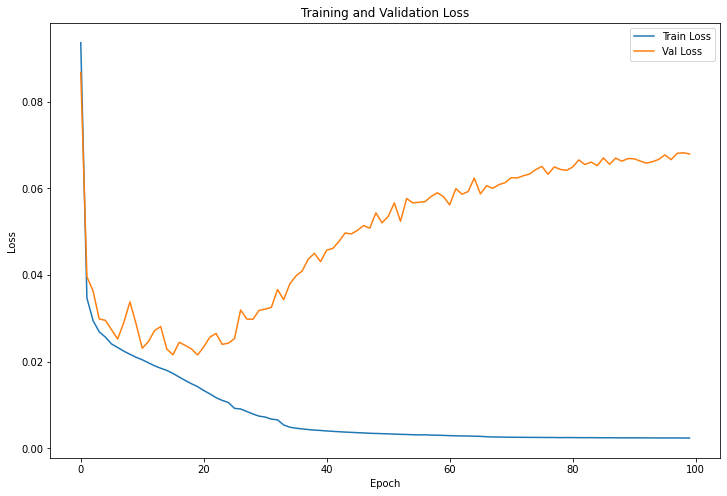

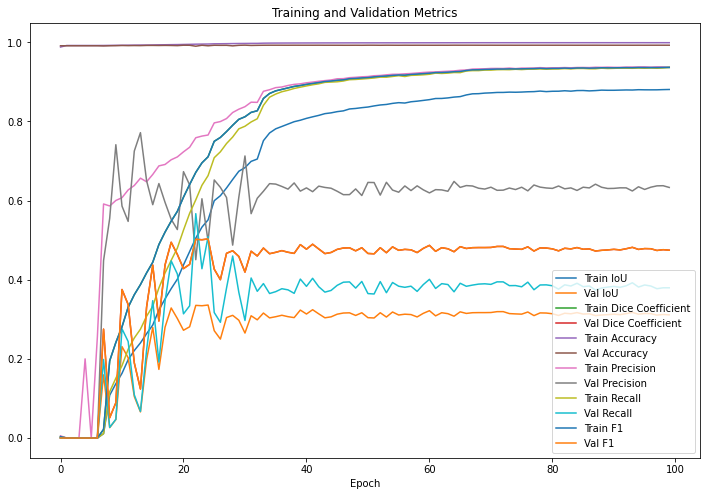

In [4]:
def train(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    y_true = []
    y_pred = []

    for images, masks in loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        outputs = torch.sigmoid(outputs)
        y_pred.extend(outputs.cpu().detach().numpy().flatten())
        y_true.extend(masks.cpu().detach().numpy().flatten())

    epoch_loss = running_loss / len(loader.dataset)
    iou = calculate_iou(y_true, (np.array(y_pred) > 0.5).astype(int))
    dice_coefficient = calculate_dice_coefficient(y_true, (np.array(y_pred) > 0.5).astype(int))
    accuracy = accuracy_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    precision = precision_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    recall = recall_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    f1 = f1_score(y_true, (np.array(y_pred) > 0.5).astype(int))

    return epoch_loss, iou, dice_coefficient, accuracy, precision, recall, f1

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks)

            running_loss += loss.item() * images.size(0)

            outputs = torch.sigmoid(outputs)
            y_pred.extend(outputs.cpu().detach().numpy().flatten())
            y_true.extend(masks.cpu().detach().numpy().flatten())

    epoch_loss = running_loss / len(loader.dataset)
    iou = calculate_iou(y_true, (np.array(y_pred) > 0.5).astype(int))
    dice_coefficient = calculate_dice_coefficient(y_true, (np.array(y_pred) > 0.5).astype(int))
    accuracy = accuracy_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    precision = precision_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    recall = recall_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    f1 = f1_score(y_true, (np.array(y_pred) > 0.5).astype(int))

    return epoch_loss, iou, dice_coefficient, accuracy, precision, recall, f1

def calculate_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    return intersection / union

def calculate_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))


def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=100):
    train_losses = []
    val_losses = []
    train_iou = []
    train_dice_coefficient = []
    train_accuracy = []
    train_precision = []
    train_recall = []
    train_f1 = []
    val_iou = []
    val_dice_coefficient = []
    val_accuracy = []
    val_precision = []
    val_recall = []
    val_f1 = []

    best_val_loss = np.inf
    best_epoch = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        train_loss, train_iou_epoch, train_dice_epoch, train_acc_epoch, train_prec_epoch, train_rec_epoch, train_f1_epoch = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_iou_epoch, val_dice_epoch, val_acc_epoch, val_prec_epoch, val_rec_epoch, val_f1_epoch = validate(model, val_loader, criterion, device)

        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | '
      f'Train IoU: {train_iou_epoch:.4f} | Val IoU: {val_iou_epoch:.4f} | '
      f'Train Dice: {train_dice_epoch:.4f} | Val Dice: {val_dice_epoch:.4f} | '
      f'Train Accuracy: {train_acc_epoch:.4f} | Val Accuracy: {val_acc_epoch:.4f} | '
      f'Train Precision: {train_prec_epoch:.4f} | Val Precision: {val_prec_epoch:.4f} | '
      f'Train Recall: {train_rec_epoch:.4f} | Val Recall: {val_rec_epoch:.4f} | '
      f'Train F1: {train_f1_epoch:.4f} | Val F1: {val_f1_epoch:.4f}')


        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_iou.append(train_iou_epoch)
        train_dice_coefficient.append(train_dice_epoch)
        train_accuracy.append(train_acc_epoch)
        train_precision.append(train_prec_epoch)
        train_recall.append(train_rec_epoch)
        train_f1.append(train_f1_epoch)
        val_iou.append(val_iou_epoch)
        val_dice_coefficient.append(val_dice_epoch)
        val_accuracy.append(val_acc_epoch)
        val_precision.append(val_prec_epoch)
        val_recall.append(val_rec_epoch)
        val_f1.append(val_f1_epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), 'vanillaunetplusplus_best_model.pth')

        scheduler.step()

    plt.figure(figsize=(12, 8))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(train_iou, label='Train IoU')
    plt.plot(val_iou, label='Val IoU')
    plt.plot(train_dice_coefficient, label='Train Dice Coefficient')
    plt.plot(val_dice_coefficient, label='Val Dice Coefficient')
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Val Accuracy')
    plt.plot(train_precision, label='Train Precision')
    plt.plot(val_precision, label='Val Precision')
    plt.plot(train_recall, label='Train Recall')
    plt.plot(val_recall, label='Val Recall')
    plt.plot(train_f1, label='Train F1')
    plt.plot(val_f1, label='Val F1')
    plt.xlabel('Epoch')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 100
model = NestedUNet(3, 1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=num_epochs // 3, gamma=0.1)

train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device)

**DeepLabV3 resnet50** (The baseline used)

/apps/local/shared/HC701/hc701_env/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Epoch 1/100, Train Loss: 0.2089, Val Loss: 0.1022, Mean Dice: 0.0010, Mean IoU: 0.8148, Pearson Correlation: 0.0000
Epoch 2/100, Train Loss: 0.0647, Val Loss: 0.0628, Mean Dice: 0.0012, Mean IoU: 0.8148, Pearson Correlation: 0.0009
Epoch 3/100, Train Loss: 0.0423, Val Loss: 0.0560, Mean Dice: 0.0188, Mean IoU: 0.8158, Pearson Correlation: 0.0325
Epoch 4/100, Train Loss: 0.0341, Val Loss: 0.0419, Mean Dice: 0.0085, Mean IoU: 0.8152, Pearson Correlation: 0.0192
Epoch 5/100, Train Loss: 0.0317, Val Loss: 0.0671, Mean Dice: 0.0317, Mean IoU: 0.8148, Pearson Correlation: 0.0579
Epoch 6/100, Train Loss: 0.0283, Val Loss: 0.0442, Mean Dice: 0.0128, Mean IoU: 0.8150, Pearson Correlation: 0.0325
Epoch 7/100, Train Loss: 0.0260, Val Loss: 0.0393, Mean Dice: 0.0340, Mean IoU: 0.8144, Pearson Correlation: 0.0587
Epoch 8/100, Train Loss: 0.0272, Val Loss: 0.0338, Mean Dice: 0.0136, Mean IoU: 0.8147, Pearson Correlation: 0.0333
Epoch 9/100, Train Loss: 0.0256, Val Loss: 0.0291, Mean Dice: 0.0519, Me

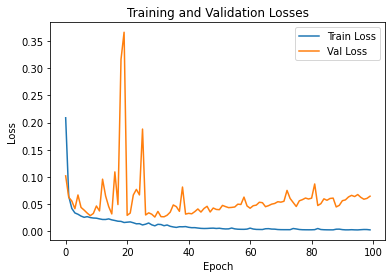

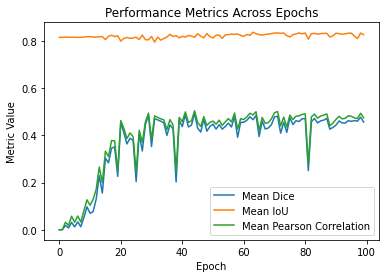

In [4]:
def dice_coeff(pred, target):
    smooth = 1.0
    intersection = (pred * target).sum()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

def iou(pred, target):
    pred = pred.bool() 
    target = target.bool()
    intersection = (pred & target).sum((1, 2))
    union = (pred | target).sum((1, 2))
    iou = (intersection + 1e-6) / (union + 1e-6)
    return iou.mean()

class UNetDeeplab(nn.Module):
    def __init__(self, input_channel, output_channel):
        super(UNetDeeplab, self).__init__()

        self.model = models.segmentation.deeplabv3_resnet50(pretrained=True)

        if input_channel != 3: 
            self.model.backbone.conv1 = nn.Conv2d(input_channel, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        self.model.classifier[4] = nn.Conv2d(256, output_channel, kernel_size=(1, 1), stride=(1, 1))

    def forward(self, x):
        return self.model(x)['out']

dev = "cuda" if torch.cuda.is_available() else "cpu"

model = UNetDeeplab(input_channel=3, output_channel=1).to(dev)
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_losses = []
val_losses = []

mean_dice_scores = []
mean_iou_scores = []
mean_pearson_correlation = []

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (images, masks) in enumerate(train_loader):
        #print(f"Batch {batch_idx}, Input shape: {images.shape}")
        optimizer.zero_grad()
        outputs = model(images.to(dev))
        loss = loss_function(outputs, masks.to(dev))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    model.eval()
    total_val_loss = 0
    total_dice, total_iou, total_pearson = 0, 0, 0
    with torch.no_grad():
        for images, masks in test_loader:
            outputs = model(images.to(dev))
            val_loss = loss_function(outputs, masks.to(dev))
            total_val_loss += val_loss.item()
            
            outputs_thresh = torch.sigmoid(outputs) > 0.5
            total_dice += dice_coeff(outputs_thresh, masks.to(dev)).item()
            
            total_iou += iou(outputs_thresh, masks.to(dev)).mean().item()
            
            outputs_np = outputs_thresh.view(-1).cpu().numpy()
            masks_np = masks.view(-1).cpu().numpy()
            pearson_corr, _ = pearsonr(outputs_np, masks_np)
            if not np.isnan(pearson_corr):
                total_pearson += pearson_corr

    avg_val_loss = total_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    avg_dice = total_dice / len(test_loader)
    mean_dice_scores.append(avg_dice)
    
    avg_iou = total_iou / len(test_loader)
    mean_iou_scores.append(avg_iou)
    
    avg_pearson = total_pearson / len(test_loader)
    mean_pearson_correlation.append(avg_pearson)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Mean Dice: {avg_dice:.4f}, Mean IoU: {avg_iou:.4f}, Pearson Correlation: {avg_pearson:.4f}')

torch.save(model.state_dict(), 'baseline_deeplab50_with_bce_loss.pth')

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

plt.plot(mean_dice_scores, label='Mean Dice')
plt.plot(mean_iou_scores, label='Mean IoU')
plt.plot(mean_pearson_correlation, label='Mean Pearson Correlation')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Performance Metrics Across Epochs')
plt.legend()
plt.savefig('performance_metrics_plot.png')
plt.show()

**DeepLabV3 resnet101**

In [ ]:
#For future testing
def train(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    y_true = []
    y_pred = []

    for images, masks in loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        outputs = torch.sigmoid(outputs)
        y_pred.extend(outputs.cpu().detach().numpy().flatten())
        y_true.extend(masks.cpu().detach().numpy().flatten())

    epoch_loss = running_loss / len(loader.dataset)
    iou = calculate_iou(y_true, (np.array(y_pred) > 0.5).astype(int))
    dice_coefficient = calculate_dice_coefficient(y_true, (np.array(y_pred) > 0.5).astype(int))
    accuracy = accuracy_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    precision = precision_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    recall = recall_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    f1 = f1_score(y_true, (np.array(y_pred) > 0.5).astype(int))

    return epoch_loss, iou, dice_coefficient, accuracy, precision, recall, f1

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks)

            running_loss += loss.item() * images.size(0)

            outputs = torch.sigmoid(outputs)
            y_pred.extend(outputs.cpu().detach().numpy().flatten())
            y_true.extend(masks.cpu().detach().numpy().flatten())

    epoch_loss = running_loss / len(loader.dataset)
    iou = calculate_iou(y_true, (np.array(y_pred) > 0.5).astype(int))
    dice_coefficient = calculate_dice_coefficient(y_true, (np.array(y_pred) > 0.5).astype(int))
    accuracy = accuracy_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    precision = precision_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    recall = recall_score(y_true, (np.array(y_pred) > 0.5).astype(int))
    f1 = f1_score(y_true, (np.    
class UNetDeeplab(nn.Module):
    def __init__(self, input_channel, output_channel):
        super(UNetDeeplab, self).__init__()

        self.model = models.segmentation.deeplabv3_resnet50(pretrained=True)

        if input_channel != 3:
            self.model.backbone.conv1 = nn.Conv2d(input_channel, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        self.model.classifier[4] = nn.Conv2d(256, output_channel, kernel_size=(1, 1), stride=(1, 1))

    def forward(self, x):
        if len(x.size()) == 3:
            x = x.unsqueeze(0) 

        return self.model(x)['out']rray(y_pred) > 0.5).astype(int))

    return epoch_loss, iou, dice_coefficient, accuracy, precision, recall, f1

def calculate_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    return intersection / union

def calculate_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=100):
    train_losses = []
    val_losses = []
    train_iou = []
    train_dice_coefficient = []
    train_accuracy = []
    train_precision = []
    train_recall = []
    train_f1 = []
    val_iou = []
    val_dice_coefficient = []
    val_accuracy = []
    val_precision = []
    val_recall = []
    val_f1 = []

    best_val_loss = np.inf
    best_epoch = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        train_loss, train_iou_epoch, train_dice_epoch, train_acc_epoch, train_prec_epoch, train_rec_epoch, train_f1_epoch = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_iou_epoch, val_dice_epoch, val_acc_epoch, val_prec_epoch, val_rec_epoch, val_f1_epoch = validate(model, val_loader, criterion, device)

        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | '
      f'Train IoU: {train_iou_epoch:.4f} | Val IoU: {val_iou_epoch:.4f} | '
      f'Train Dice: {train_dice_epoch:.4f} | Val Dice: {val_dice_epoch:.4f} | '
      f'Train Accuracy: {train_acc_epoch:.4f} | Val Accuracy: {val_acc_epoch:.4f} | '
      f'Train Precision: {train_prec_epoch:.4f} | Val Precision: {val_prec_epoch:.4f} | '
      f'Train Recall: {train_rec_epoch:.4f} | Val Recall: {val_rec_epoch:.4f} | '
      f'Train F1: {train_f1_epoch:.4f} | Val F1: {val_f1_epoch:.4f}')


        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_iou.append(train_iou_epoch)
        train_dice_coefficient.append(train_dice_epoch)
        train_accuracy.append(train_acc_epoch)
        train_precision.append(train_prec_epoch)
        train_recall.append(train_rec_epoch)
        train_f1.append(train_f1_epoch)
        val_iou.append(val_iou_epoch)
        val_dice_coefficient.append(val_dice_epoch)
        val_accuracy.append(val_acc_epoch)
        val_precision.append(val_prec_epoch)
        val_recall.append(val_rec_epoch)
        val_f1.append(val_f1_epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), 'resnet101_best_model.pth')

        scheduler.step()

    plt.figure(figsize=(12, 8))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(train_iou, label='Train IoU')
    plt.plot(val_iou, label='Val IoU')
    plt.plot(train_dice_coefficient, label='Train Dice Coefficient')
    plt.plot(val_dice_coefficient, label='Val Dice Coefficient')
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Val Accuracy')
    plt.plot(train_precision, label='Train Precision')
    plt.plot(val_precision, label='Val Precision')
    plt.plot(train_recall, label='Train Recall')
    plt.plot(val_recall, label='Val Recall')
    plt.plot(train_f1, label='Train F1')
    plt.plot(val_f1, label='Val F1')
    plt.xlabel('Epoch')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 100
model = UNetDeeplab101(3, 1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=num_epochs // 3, gamma=0.1)

train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device)